In [1]:
import subprocess

In [3]:
command = "ffmpeg -i /mnt/D/fanmingke/dataset/AudioVisualClip/DC/a1.avi -ab 160k -ac 2 -ar 44100 -vn audio.wav"
subprocess.call(command,shell=True)

0

In [8]:
import librosa
data,sampling_rate = librosa.load('/mnt/D/fanmingke/project/video2audio/audio.wav')
print("Data Type",data.dtype,"shape",data.shape)
print(sampling_rate)

Data Type float32 shape (80434,)
22050


44100 [1112 1112 1112 ...,  946  930  916] 160868
nn is range(1323, 160868, 441)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


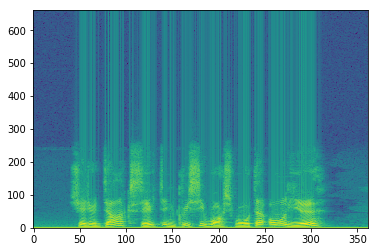

In [2]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('audio.wav')

x=x.T
x=x[0]
# sr x
print(sr,x,len(x))


## Parameters : 10ms step 30ms window
nstep = int(sr * 0.01)
nwin = int(sr * 0.03)
nfft = nwin

# >>> np.hamming(12)
# array([ 0.08      ,  0.15302337,  0.34890909,  0.60546483,  0.84123594,
#         0.98136677,  0.98136677,  0.84123594,  0.60546483,  0.34890909,
#         0.15302337,  0.08      ])
# 返回指定长度的余弦函数 最大值1 最小值0
window = np.hamming(nwin) #hamming窗口 截取语音片段 并形成余弦函数 只有（0，pi）区间有值 其他区间为0

nn = range(nwin,len(x), nstep)
print('nn is {0}'.format(nn))

X = np.zeros((len(nn),nfft//2))# //为整除
print(X)

#滑动窗口
for i,n in enumerate(nn):
    #print(n,nwin)
    xseg = x[(n-nwin):n] #长度为nwin的序列
    #print(xseg)
    #print(window)
    #print(window*xseg)
    # window * xseg 就是单纯的相乘 从而将xseg序列映射在hanming窗口的余弦函数上
    z = np.fft.fft(window * xseg,nfft) # 进行hamming窗中数据的快速傅里叶转换
    X[i,:] = np.log(np.abs(z[:nfft//2])) # 截取其中一半
    
plt.imshow(X.T,interpolation='nearest',origin='lower',aspect='auto') # T为转置

plt.show()